In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"data\white_percentage_df.csv")

In [3]:
df['white_fraction_1'] = df['white_percentage_1'] / 100
df['white_fraction_2'] = df['white_percentage_2'] / 100

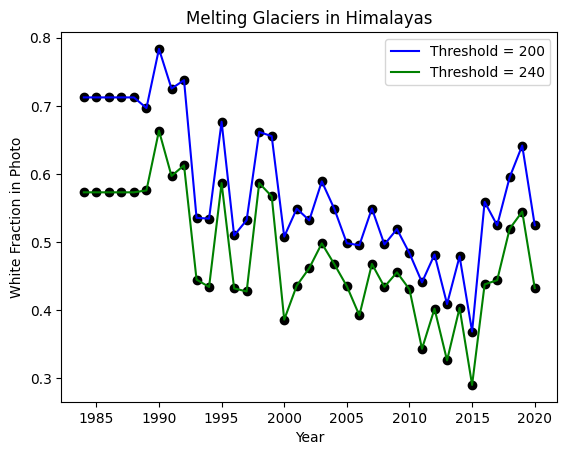

In [4]:
x = df['years']
y1= df['white_fraction_1']
y2= df['white_fraction_2']
plt.plot(x, y1, c = 'blue')
plt.plot(x, y2, c = 'green')
plt.scatter(x, y1, c = 'black')
plt.scatter(x, y2, c = 'black')
plt.xlabel("Year")
plt.ylabel("White Fraction in Photo")
plt.title("Melting Glaciers in Himalayas")
plt.legend(["Threshold = 200", "Threshold = 240"])
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result1 = adfuller(df['white_fraction_1'])

result1

# If p-value > 0.05, the series is not stationary

(-2.688850392569812,
 0.0759875901235154,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 -61.33292382511324)

In [6]:
import statsmodels.api as sm

#perform KPSS test
result2 = sm.tsa.stattools.kpss(df['white_fraction_1'], regression='ct')

result2

# If p-value < 0.05, the series is not stationary

(0.1488414310993529,
 0.04763214075053924,
 3,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

<Axes: >

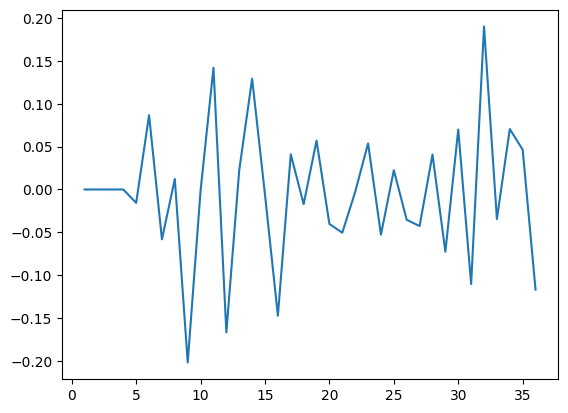

In [7]:
diff1 = df['white_fraction_1'].diff().dropna()
diff1.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result3 = adfuller(diff1)

result3

(-6.214765400392906,
 5.399320201663464e-08,
 1,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 -58.00456353862893)